In [1]:
# penguins: body_mass_g
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


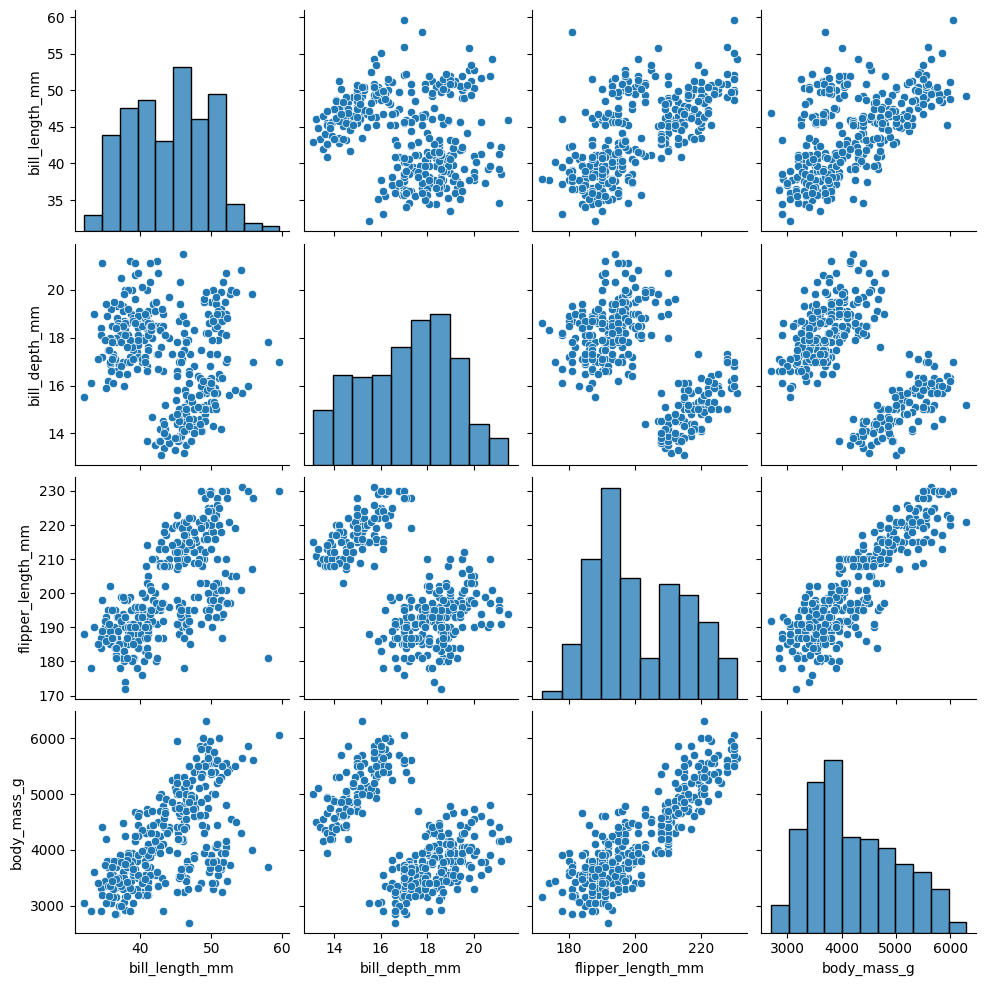

In [2]:
sns.pairplot(df)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separar X e y
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df['body_mass_g']

# DataFrame de resultados:
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

# Regresión lineal múltiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # (multiplicar mentalmente por 100) error promedio 7,7 % respecto del valor real de la masa corporal

df_resultados.loc[len(df_resultados)] = ['RLM 3 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183


In [4]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


<Axes: >

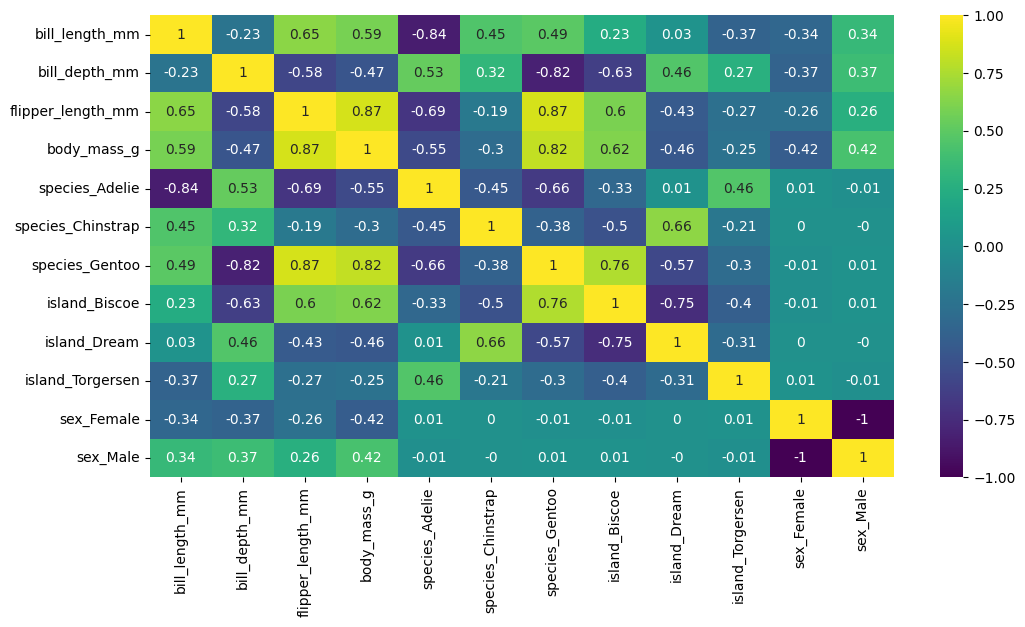

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
# RLM con todas las columnas

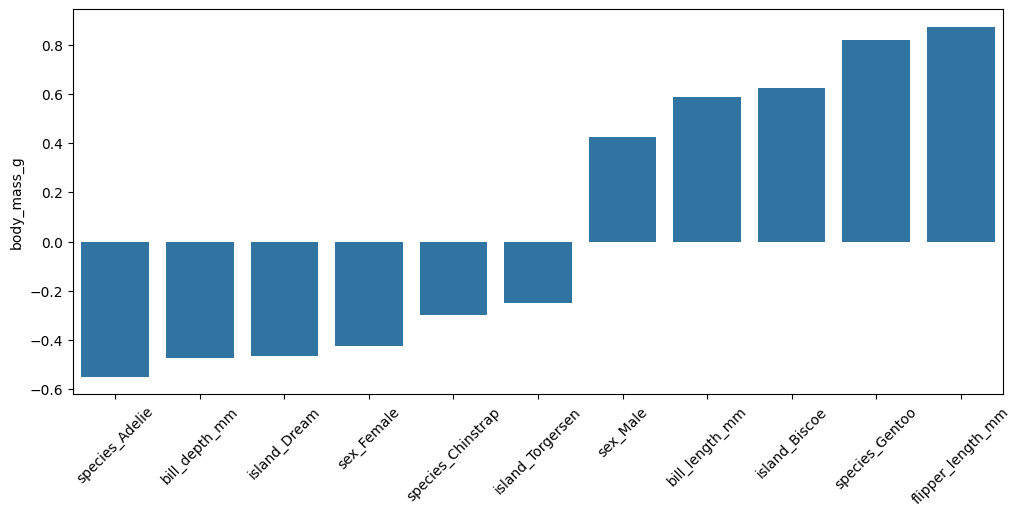

In [6]:
# correlaciones de cada columna con body_mass_g
plt.figure(figsize=(12, 5))
sns.barplot(df.corr()['body_mass_g'].drop('body_mass_g').sort_values())
plt.xticks(rotation=45);

In [7]:
# Separar X e y
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 11 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982


In [8]:
# RLM con drop first en get_dummies, borra una de las columnas de cada dummies generados 
# para evitar correlación entre ellas, evitar multicolinealidad
# Observamos que da los mismos resultados que hacer un get_dummies normal
# Lo que sugiere que es mejor hacerlo con drop_first porque con menor cantidad de columnas logramos los mismos resultados
# Con menos columnas el modelo va a entrenar más ligero porque tiene que procesar menos datos
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982


In [9]:
# KNN - K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

"""
model = KNeighborsRegressor() # por defecto n_neighbors es 5
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['KNN k = 5', r2, mae, rmse, mape]
df_resultados
"""

"\nmodel = KNeighborsRegressor() # por defecto n_neighbors es 5\nmodel.fit(X, y)\ny_pred = model.predict(X)\n\nr2 = r2_score(y, y_pred)\nmae = mean_absolute_error(y, y_pred)\nrmse = root_mean_squared_error(y, y_pred)\nmape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real\n\ndf_resultados.loc[len(df_resultados)] = ['KNN k = 5', r2, mae, rmse, mape]\ndf_resultados\n"

In [10]:
# bucle for para KNN para encontrar el mejor valor K
for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k) # el valor k cambiar en cada iteracion
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k}', r2, mae, rmse, mape]
    df_resultados
    
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
5,KNN k = 4,0.885988,211.524024,271.477923,0.051974
6,KNN k = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
7,KNN k = 6,0.874647,223.961461,284.660507,0.055181
8,KNN k = 7,0.869713,227.670528,290.208117,0.056204
9,KNN k = 8,0.865178,231.719219,295.216096,0.056983
10,KNN k = 9,0.861314,236.603270,299.415900,0.058211


KNN

Computacionalmente costoso, ya que es lazy o perezoso, realiza los cálculos en el predict
no existe un entrenamiento pesado como en los otros métodos, el modelo simplemente almacena los datos
en el entrenamiento, y para hacer una predicción (regresión o clasificación) busca y calcula los K vecinos más cercanos a cada punto (o instancia) que se quiere predecir

In [11]:
# escalado y volver a probar KNN
# KNN es sensible a la escala, debido al cálculo de distancias
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # error del 3,8 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k}', r2, mae, rmse, mape]
    df_resultados
    
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
11,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
12,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
13,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
14,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
15,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
16,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363
17,KNN scaled k = 8,0.891224,209.984985,265.171347,0.051982
18,KNN scaled k = 9,0.889764,211.928595,266.944664,0.052495


In [12]:
# Particionamiento para Regresión lineal múltiple 8 col
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col (test)', r2, mae, rmse, mape]
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
11,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
12,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
13,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
14,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
15,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
16,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363
17,KNN scaled k = 8,0.891224,209.984985,265.171347,0.051982


In [13]:
# Particionamiento para KNN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for k in range(2,10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k} (test)', r2, mae, rmse, mape]
    df_resultados.sort_values('R2', ascending=False)

In [14]:
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
5,KNN k = 4,0.885988,211.524024,271.477923,0.051974
6,KNN k = 5,0.876481,220.420420,282.569718,0.054214
7,KNN k = 6,0.874647,223.961461,284.660507,0.055181
8,KNN k = 7,0.869713,227.670528,290.208117,0.056204
9,KNN k = 8,0.865178,231.719219,295.216096,0.056983


In [15]:
# Particionamiento con escalado para KNN: MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
# introduce data leakage o fuga de datos o fuga de información
# porque entrena el scaler con datos de test que usar para escalar datos de train que enseña al modelo
# por tanto el modelo está recibiendo datos escalados influenciados por datos de test
# scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train) # fit_transform solo sobre entrenamiento
X_test_scaled = scaler.transform(X_test)

for k in range(2, 30):
    model = KNeighborsRegressor(n_neighbors=k) # k = 2, 3, 4, 5, 6, 7, 8....
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k} (test)', r2, mae, rmse, mape]

In [16]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716
53,KNN scaled k = 27 (test),0.879977,209.715312,274.967892,0.052871


In [17]:
# StandardScaler en regresión lineal múltiple
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# estandarización
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM 8 col scaled (test)', r2, mae, rmse, mape]


In [18]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716


## CART Árbol de decisión para regresión

* Fácil interpretabilidad, scikit nos muestra el árbol resultante en texto e imagen
* No necesita el escalado
* No le afecta tanto los outliers
* Hace automáticamente los cortes umbrales para decidir los nodos
* Importante: ajustar la profundidad para evitar overfitting o sobreajuste
* Por sí solo puede ser débil, suele usarse en combinación de muchos árboles creando así un Random Forest
* Sensible si hay pocos datos
* Detecta autáticamente las categóricas

In [19]:
# sin particionamiento, haciendo predicciones sobre datos X con los que se ha entrenado
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

model = DecisionTreeRegressor(max_depth=2) # profundidad 2 para poder ver el árbol
model.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [20]:
# ver el árbol en forma texto
print(export_text(model, feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [3419.16]
|   |--- sex_Male >  0.50
|   |   |--- value: [4010.28]
|--- species_Gentoo >  0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [4679.74]
|   |--- sex_Male >  0.50
|   |   |--- value: [5484.84]



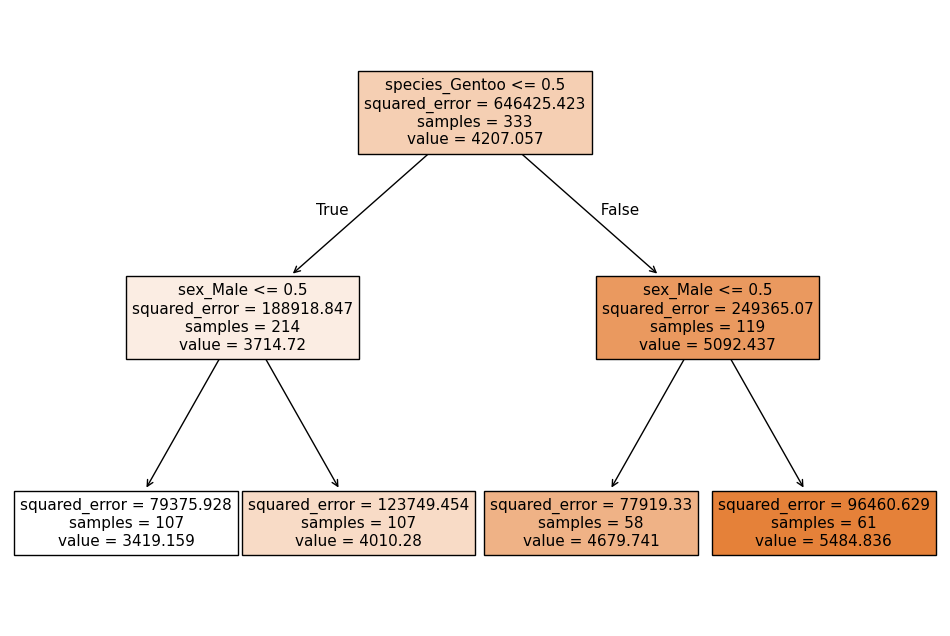

In [21]:
# ver el árbol en forma gráfico
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, filled=True);

In [22]:
for depth in range(2, 10): 
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth}', r2, mae, rmse, mape]

In [23]:
# con particionamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
for depth in range(2, 10): 
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth} (test)', r2, mae, rmse, mape]

In [24]:
df_resultados.sort_values('R2', ascending=False).head(25)

,Modelo,R2,MAE,RMSE,MAPE
64,DTR depth 9,0.979163,66.124100,116.059321,0.017399
63,DTR depth 8,0.966464,95.197774,147.236934,0.024364
62,DTR depth 7,0.950184,124.736132,179.450216,0.031578
11,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
61,DTR depth 6,0.933635,153.929241,207.122845,0.038373
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
12,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
60,DTR depth 5,0.913913,183.844444,235.899754,0.045646
13,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
14,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960


In [25]:
#df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]
#df_resultados.sort_values('R2', ascending=False).head(30)
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


C:\Users\carol\AppData\Local\Temp\ipykernel_45036\4059637814.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\carol\AppData\Local\Temp\ipykernel_45036\4059637814.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716


In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
for depth in range(2, 15): 
    model = RandomForestClassifier(n_estimators=200, max_depth=depth, ccp_alpha=0.03)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'RF depth {depth} (test)', r2, mae, rmse, mape]

In [27]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\carol\AppData\Local\Temp\ipykernel_45036\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716


	Modelo	R2	MAE	RMSE	MAPE
56	RLM 8 col scaled (test)	0.896169	196.208892	255.749079	0.048622
19	RLM 8 col (test)	0.896169	196.208892	255.749079	0.048622
49	KNN scaled k = 23 (test)	0.882996	207.852044	271.487619	0.052733
50	KNN scaled k = 24 (test)	0.882233	207.322761	272.372177	0.052495
51	KNN scaled k = 25 (test)	0.882200	208.402985	272.410002	0.052608
46	KNN scaled k = 20 (test)	0.881606	206.473881	273.095466	0.052269
47	KNN scaled k = 21 (test)	0.881375	207.231699	273.362595	0.052570
48	KNN scaled k = 22 (test)	0.881342	208.412483	273.400275	0.052824
52	KNN scaled k = 26 (test)	0.880857	208.409874	273.957755	0.052650
38	KNN scaled k = 12 (test)	0.880362	216.386816	274.526461	0.054716
53	KNN scaled k = 27 (test)	0.879977	209.715312	274.967892	0.052871
45	KNN scaled k = 19 (test)	0.879308	209.308720	275.733123	0.053086
39	KNN scaled k = 13 (test)	0.879281	215.700344	275.764275	0.054760
44	KNN scaled k = 18 (test)	0.879268	207.566335	275.778825	0.052763
55	KNN scaled k = 29 (test)	0.879076	209.650026	275.998061	0.052843
35	KNN scaled k = 9 (test)	0.879003	215.132670	276.081262	0.054252
54	KNN scaled k = 28 (test)	0.878943	211.007463	276.149925	0.053233
37	KNN scaled k = 11 (test)	0.878434	217.367707	276.730569	0.054915
40	KNN scaled k = 14 (test)	0.878208	216.178038	276.987512	0.054993
36	KNN scaled k = 10 (test)	0.876972	218.134328	278.388553	0.055018
43	KNN scaled k = 17 (test)	0.876619	211.435470	278.788582	0.053714
29	KNN scaled k = 3 (test)	0.875117	220.895522	280.480221	0.055299
32	KNN scaled k = 6 (test)	0.874876	216.417910	280.750778	0.054469
42	KNN scaled k = 16 (test)	0.874673	214.085821	280.978310	0.054250
41	KNN scaled k = 15 (test)	0.874437	215.746269	281.242136	0.054752
34	KNN scaled k = 8 (test)	0.874276	217.397388	281.422781	0.054830
31	KNN scaled k = 5 (test)	0.871614	223.059701	284.386614	0.055861
33	KNN scaled k = 7 (test)	0.868386	223.347548	287.939099	0.056255
65	DTR depth 2 (test)	0.867135	224.532382	289.304823	0.056626
30	KNN scaled k = 4 (test)	0.866294	228.358209	290.218732	0.057319
67	DTR depth 4 (test)	0.863858	235.921803	292.850421	0.058694
66	DTR depth 3 (test)	0.859232	234.635980	297.784135	0.057911
24	KNN k = 6 (test)	0.857163	236.442786	299.964585	0.059184
68	DTR depth 5 (test)	0.854761	250.932869	302.477149	0.062561
26	KNN k = 8 (test)	0.852071	237.266791	305.264893	0.058990
25	KNN k = 7 (test)	0.849934	244.562900	307.461901	0.060993
23	KNN k = 5 (test)	0.849513	239.850746	307.892451	0.060586
27	KNN k = 9 (test)	0.848025	241.086235	309.411260	0.060116
22	KNN k = 4 (test)	0.838114	242.723881	319.341162	0.061353
28	KNN scaled k = 2 (test)	0.832859	264.552239	324.482941	0.065895
20	KNN k = 2 (test)	0.827976	274.813433	329.188708	0.068900
21	KNN k = 3 (test)	0.824328	262.437811	332.661014	0.065228
69	DTR depth 6 (test)	0.811359	264.667814	344.720993	0.064022
78	RF depth 7 (test)	0.799718	289.925373	355.198599	0.071133
77	RF depth 6 (test)	0.799111	285.074627	355.736570	0.070674
76	RF depth 5 (test)	0.798622	280.970149	356.168981	0.070789
70	DTR depth 7 (test)	0.796214	276.716059	358.292487	0.068425
75	RF depth 4 (test)	0.795275	280.223881	359.116349	0.071340
74	RF depth 3 (test)	0.780823	275.746269	371.576412	0.070956
72	DTR depth 9 (test)	0.777657	280.142308	374.249888	0.068198
71	DTR depth 8 (test)	0.763980	295.996847	385.588841	0.072956
79	RF depth 8 (test)	0.760165	320.895522	388.692796	0.078345
73	RF depth 2 (test)	0.757781	322.761194	390.619963	0.080437
85	RF depth 14 (test)	0.736457	325.746269	407.451581	0.080114
84	RF depth 13 (test)	0.734813	327.611940	408.720245	0.080167
80	RF depth 9 (test)	0.723011	340.671642	417.716340	0.082877
82	RF depth 11 (test)	0.722789	344.776119	417.883794	0.084713
81	RF depth 10 (test)	0.713785	342.537313	424.615717	0.083365
83	RF depth 12 (test)	0.705996	352.985075	430.354765	0.087123

In [28]:
# SVM 